In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook'])

The general purpose of most first year physics labs is change an **independent** variable $x$, collect measurements $x_i$ and $y_i$, ans use these to determine a physical parameter:

**Example 1**: Falling object $t = \sqrt{2h/g}$. Here $x=h$ (change height of dropped object) $y=t$ (dependent variable) and one wants to measure $g$. Measurements are $(h_i, t_i)$.

In [1]:
# code up these arrays

**Example 2**: $V=IR$. Change voltage, measure change in current, determine $R$. Here $x=V$ and $y=I$, one wants to measure $R$, Measurements are $(V_i, I_i)$

In our case, we have the equation $T=\sqrt{\frac{L}{g}}$ and we're changing the length of the pendulum and seeing how that affects the frequency:

* $x=L$ (the independent variable that we're changing)
* $y=T$ (what we're measuring in response to changing $x$)
* Parameter we want to estimate is $g$.
* Measurements are $(L_i, T_i)$

In all these cases, even one measurement $(x_i, y_i)$ is enough to determine the parameter of interest. But if we collect many pairs, we can test the physical laws over a larger parameter space

Ultimately we want to **rearrange** our data so its of the form $Y=MX+B$ where $Y=f(y)$ and $X=f(x)$.

**Example 1**: 
* (Option 1) We can choose $Y=t$ and $X=\sqrt{h}$ then if follows that $\boxed{Y=\sqrt{2/g}X+0}$ so $m=\sqrt{2/g}$ and $b=0$.
* (Option 2) We can square both sides to get $t^2=2h/g$ then choose $Y=t^2$ and $X=h$ to get $\boxed{Y=(2/g)X+0}$ so $m=2/g$ and $b=0$.

Then you can do a fit on $(X_i,Y_i)$ to get $M$, and from $M$ you can get information on the physical parameter

In [63]:
g = 9.81
L = np.arange(0.1,1,0.1)
T = np.sqrt(l/g) + np.random.randn(9)*0.005
uT = np.ones(9)*0.01
N = len(L)

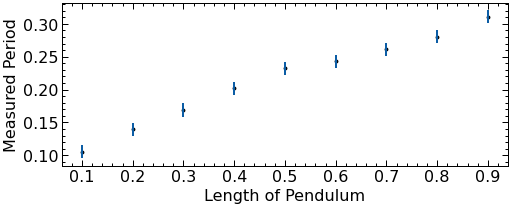

In [64]:
plt.figure(figsize=(8,3))
plt.scatter(l,T, color='k',s=8)
plt.errorbar(l,T,uT,ls='')
plt.xlabel('Length of Pendulum')
plt.ylabel('Measured Period')
plt.show()

Using the fact that $T=\sqrt{L/g}$ we can rearrange this to

$$T^2 = \left(\frac{1}{g}\right)L$$

so we can compare it to

$$Y = MX+B$$

* $Y$ is as $T^2$. This is the dependent variable (the thing we measure)
* $X$ is as $L$. This is the independent variable (the thing we change)
* $M$ is as $1/g$. This is a parameter.
* $B=0$. This is also a parameter, but we know its zero in this case.

In [65]:
y_data = T**2
x_data = L

What about the uncertainties? We know that

$$u[f(x)] \approx \left| \frac{df}{dx} \right| u[x]$$

and thus

$$u[T^2] = \left| 2T \right| u[T]$$

In [66]:
uy_data = 2*T*uT

For any fitted function $f$ to some data $(x_i, y_i)$, the value of $\chi^2$ is

$$\chi^2 = \frac{1}{N-P}\sum_{i=1}^N \left( \frac{y_i - f(x_i;\text{parameters})}{u[y_i]} \right)^2$$

* **Linear**: $f(x_i;\text{parameters}) = mx+b$ so the parameters are $m$ and $b$  and number of parameters $P=2$
* **Quadratic**: $f(x_i;\text{parameters}) = ax^2+bx+c$ so the parameters are $a$, $b$ and $c$ and number of params $P=3$

It turns out that we want to adjust the parameters so that $\chi^2$ is as small as possible. This gives the best possible parameters for our fit. Why? 

1. Assume that your measurements $y_i$ are Gaussian with mean $f(x_i) = mx_i+b$ and standard deviation $u[y_i]$
2. After applying various statistical theorems, the most likely values of $m$ and $b$, given the data $(x_i, y_i)$ that you measured, are the ones that minimizes the $\chi^2$ quantity above.

Furthermore, the smaller the value of $\chi^2$ that you obtain, the more likely that $m$ and $b$ (and thus the model $f$) actually describe your data. The solution that minimizes $\chi^2$ when fitting the line $y=mx$ to some data $(x_i, y_i)$ is

$$m = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$$

and the uncertainty on the fit parameter is

$$u[m] = \sqrt{\frac{1}{N}\frac{\sum_i (y_i - mx_i)^2}{\sum_i x_i^2}}$$

In [67]:
m = sum(x_data*y_data)/sum(x_data**2)
um = np.sqrt(1/N * sum(y_data-m*x_data)**2 / sum(x_data**2))
chi2 = 1/(N-1) * sum(((y_data-m*x_data)/uy_data)**2)

In [68]:
x = np.linspace(min(x_data), max(x_data), 1000)
y = m*x

Text(0, 0.5, 'Measured Period')

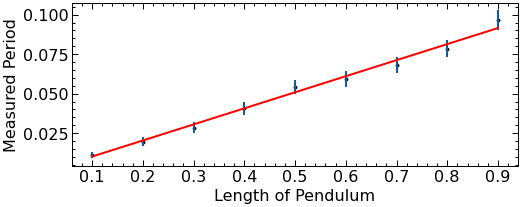

In [69]:
plt.figure(figsize=(8,3))
plt.scatter(x_data,y_data, color='k',s=8)
plt.errorbar(x_data,y_data,uy_data,ls='')
plt.plot(x,y,'-',color='red')
plt.xlabel('Length of Pendulum')
plt.ylabel('Measured Period')

In [70]:
chi2

0.31314179249010343

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
x = np.linspace(-10, 10, 20000)
y = np.abs(x)<1/2
y = y.astype(float)

fft_y = np.fft.fft(y)
fft_feq = np.fft.fftfreq(len(x), np.diff(x)[0]) #np.diff(x)[0] = Delta x

# Adjustment so that you start with negative frequencies and end with positive
fft_y = np.fft.fftshift(fft_y.real)
fft_feq = np.fft.fftshift(fft_feq)

(-10.0, 10.0)

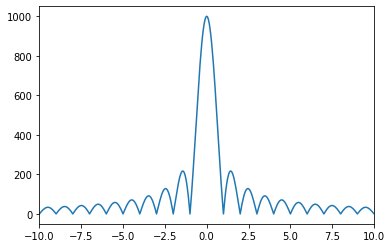

In [37]:
plt.plot(fft_feq,plot_fft)
plt.xlim(-10,10)